# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch

%matplotlib inline

# Dataset

In [6]:
data = np.genfromtxt('toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape', X.shape)
print('y.shape', y.shape)

shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/ sigma
X_test = (X_test - mu)/ sigma

Class label counts: [50 50]
X.shape (100, 2)
y.shape (100,)


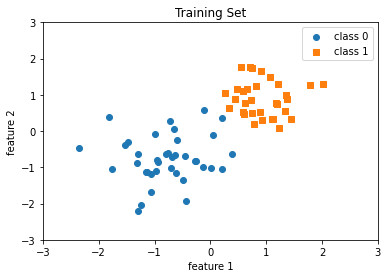

In [16]:
plt.scatter(X_train[y_train==0, 0],X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0],X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training Set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

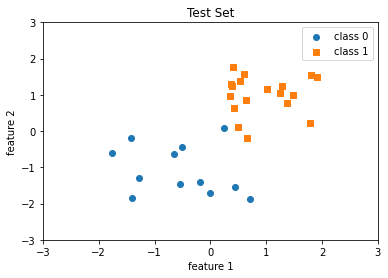

In [17]:
plt.scatter(X_test[y_test==0, 0],X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0],X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test Set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)
        
    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear>0., self.ones, self.zeros)
        return predictions
    
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    
    def train(self, x, y ,epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features, 1)
                self.bias+= errors
    
    def evaluate(self, x ,y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float()/ y.shape[0]
        return accuracy
                
    
    
    
    
    

In [35]:
ppn = Perceptron(num_features = 2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model Parameters:')
print(' Weights: %s' % ppn.weights)
print(' Bias: %s' % ppn.bias)


Model Parameters:
 Weights: tensor([[1.2734],
        [1.3464]])
 Bias: tensor([-1.])


In [49]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: {0:.2f}'.format(test_acc*100))

Test set accuracy: 93.33


/Users/dsouza/.conda/envs/baseline/lib/python3.7/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/dsouza/.conda/envs/baseline/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False,

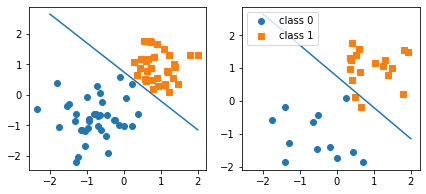

In [53]:
# 2D decision boundary

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0])
         /w[1]
         )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0])
         /w[1]
         )

fig, ax = plt.subplots(1,2, sharex=True, figsize=(7,3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()